In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Dataset

In [34]:
dataset = pd.read_csv('pd_speech_features.csv')
dataset.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


# Explore dataset

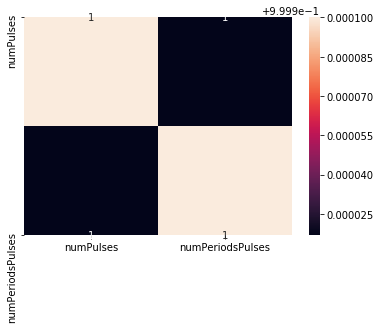

In [3]:
sns.heatmap(dataset[['numPulses', 'numPeriodsPulses']].corr(), annot=True)
# dataset[['numPulses', 'numPeriodsPulses']].corr()

In [123]:
dataset.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [120]:
dataset.shape

(756, 755)

In [129]:
dataset.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [137]:
dataset[dataset.isnull().any(axis='columns')]

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class


In [138]:
dataset.nunique()

id                           252
gender                         2
PPE                          740
DFA                          745
RPDE                         748
                            ... 
tqwt_kurtosisValue_dec_33    752
tqwt_kurtosisValue_dec_34    753
tqwt_kurtosisValue_dec_35    753
tqwt_kurtosisValue_dec_36    754
class                          2
Length: 755, dtype: int64

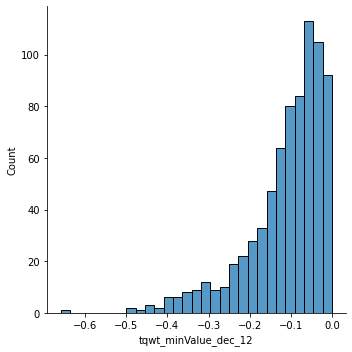

In [151]:
sns.displot(dataset.tqwt_minValue_dec_12)

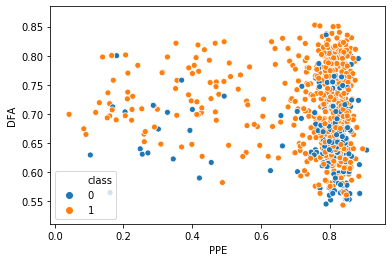

In [34]:
sns.scatterplot(x='PPE', y='DFA', hue=target, data=dataset)

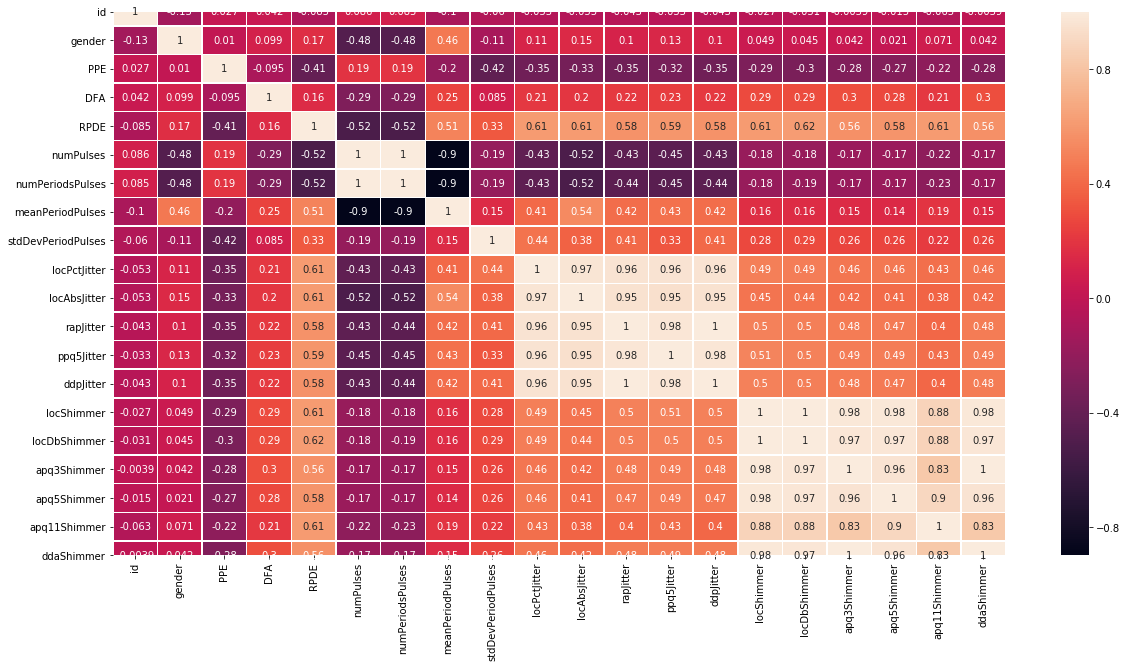

In [6]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(dataset[dataset.columns[:20]].corr(), annot=True, linewidths=0.5)

From above heatmap we can see that many features are correlated with each other for example numPulses and numPeriodsPulses are highly correlated.

In [35]:
features = dataset.drop(['id', 'class'], axis=1)
target = dataset['class']
dataset['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [28]:
features.shape

(756, 753)

# Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
new_features = SelectKBest(f_classif, k=20).fit(features, target)

In [37]:
new_dataset = pd.DataFrame({'Feature': list(features.columns), 'Scores':new_features.scores_})
new_dataset = new_dataset.sort_values(by='Scores', ascending=False)
new_dataset

,Feature,Scores
58,mean_MFCC_2nd_coef,142.506911
620,tqwt_minValue_dec_12,140.011407
584,tqwt_stdValue_dec_12,137.750103
656,tqwt_maxValue_dec_12,136.312113
583,tqwt_stdValue_dec_11,136.142253
...,...,...
350,tqwt_energy_dec_30,0.000607
685,tqwt_skewnessValue_dec_5,0.000462
343,tqwt_energy_dec_23,0.000161
339,tqwt_energy_dec_19,0.000089


In [38]:
new_features = new_features.transform(features)

In [39]:
columns = new_dataset.iloc[:20, 0].values
columns

array(['mean_MFCC_2nd_coef', 'tqwt_minValue_dec_12',
       'tqwt_stdValue_dec_12', 'tqwt_maxValue_dec_12',
       'tqwt_stdValue_dec_11', 'tqwt_entropy_log_dec_12',
       'tqwt_maxValue_dec_11', 'tqwt_minValue_dec_11',
       'tqwt_minValue_dec_13', 'std_9th_delta_delta',
       'std_8th_delta_delta', 'tqwt_maxValue_dec_13',
       'std_7th_delta_delta', 'tqwt_stdValue_dec_13',
       'std_6th_delta_delta', 'tqwt_entropy_shannon_dec_11',
       'tqwt_kurtosisValue_dec_27', 'std_8th_delta',
       'tqwt_entropy_log_dec_11', 'tqwt_TKEO_std_dec_12'], dtype=object)

In [40]:
X = pd.DataFrame(new_features, columns=columns)

In [41]:
X.shape

(756, 20)

In [42]:
xx_ = X

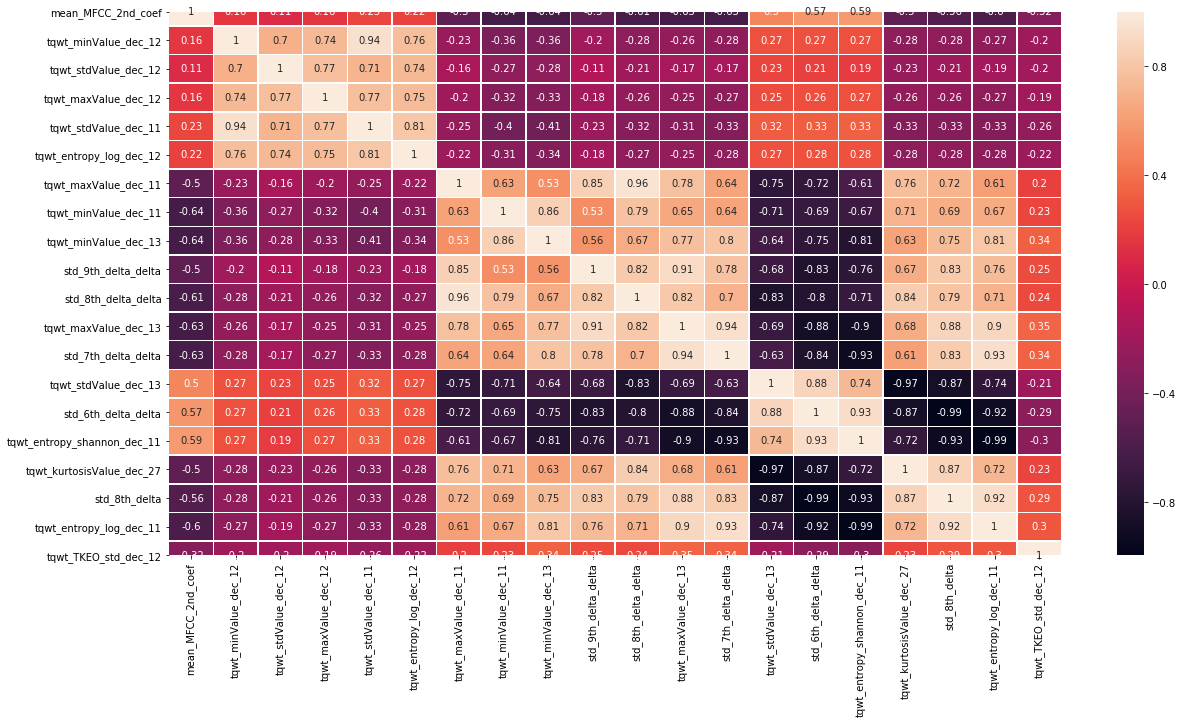

In [19]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(X.corr(), annot=True, linewidths=0.5)

In [20]:
X = X.drop(['std_6th_delta_delta', 'std_8th_delta', 'tqwt_entropy_log_dec_11', 'tqwt_entropy_shannon_dec_11'], axis=1)

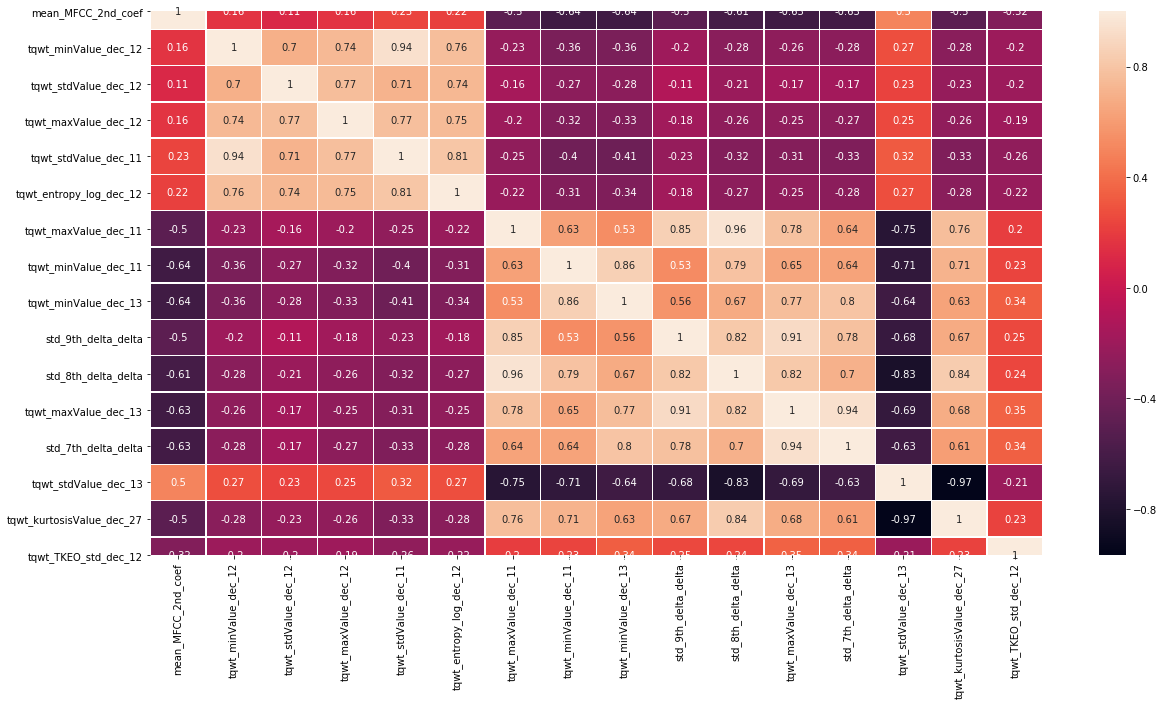

In [21]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(X.corr(), annot=True, linewidths=0.5)

# Standardize Data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
X

array([[ 0.73517687, -0.92648377, -0.96159746, ..., -0.92645109,
        -0.92694092, -0.4458768 ],
       [ 0.98224594, -1.44864682,  0.64215356, ..., -0.13728568,
        -0.52035986, -0.4457303 ],
       [ 1.17583946, -0.55687063,  0.51025545, ..., -0.90599175,
        -0.98500558, -0.44603016],
       ...,
       [-1.44272019, -0.83186421, -1.11062903, ...,  1.72221196,
         0.99460208,  2.66175181],
       [-0.86707689, -1.00784957, -0.69248396, ...,  1.03559441,
         0.46284601, -0.35670123],
       [-0.33087932, -0.127835  ,  0.16684772, ...,  0.89672206,
         0.45018974, -0.22608863]])

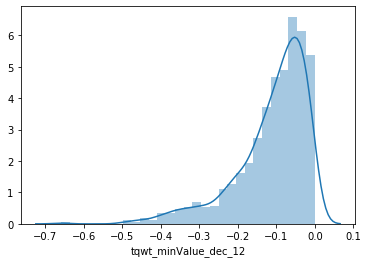

In [29]:
sns.distplot(dataset.tqwt_minValue_dec_12)

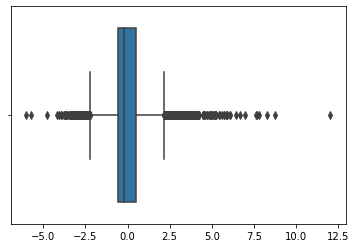

In [30]:
sns.boxplot(X)

# Multilayer Perceptron

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(529, 20)
(227, 20)
(529,)
(227,)


In [46]:
from sklearn.neural_network import MLPClassifier
per_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, early_stopping=False, verbose=True)
print(per_model)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)


In [47]:
per_model.fit(X_train, y_train)

Iteration 1, loss = 0.90014173
Iteration 2, loss = 0.81801139
Iteration 3, loss = 0.74892743
Iteration 4, loss = 0.69134057
Iteration 5, loss = 0.64230970
Iteration 6, loss = 0.60091835
Iteration 7, loss = 0.56727753
Iteration 8, loss = 0.53922747
Iteration 9, loss = 0.51684356
Iteration 10, loss = 0.49900332
Iteration 11, loss = 0.48484718
Iteration 12, loss = 0.47420545
Iteration 13, loss = 0.46545619
Iteration 14, loss = 0.45770474
Iteration 15, loss = 0.45108149
Iteration 16, loss = 0.44570099
Iteration 17, loss = 0.44182306
Iteration 18, loss = 0.43737969
Iteration 19, loss = 0.43388553
Iteration 20, loss = 0.43046563
Iteration 21, loss = 0.42741750
Iteration 22, loss = 0.42466313
Iteration 23, loss = 0.42177126
Iteration 24, loss = 0.41955538
Iteration 25, loss = 0.41719383
Iteration 26, loss = 0.41463198
Iteration 27, loss = 0.41246142
Iteration 28, loss = 0.41047394
Iteration 29, loss = 0.40826160
Iteration 30, loss = 0.40632614
Iteration 31, loss = 0.40437774
Iteration 32, los

Iteration 262, loss = 0.26111677
Iteration 263, loss = 0.26063539
Iteration 264, loss = 0.25984436
Iteration 265, loss = 0.25976770
Iteration 266, loss = 0.25924995
Iteration 267, loss = 0.25859080
Iteration 268, loss = 0.25824409
Iteration 269, loss = 0.25771663
Iteration 270, loss = 0.25723041
Iteration 271, loss = 0.25677416
Iteration 272, loss = 0.25631591
Iteration 273, loss = 0.25620061
Iteration 274, loss = 0.25534944
Iteration 275, loss = 0.25506516
Iteration 276, loss = 0.25494928
Iteration 277, loss = 0.25409062
Iteration 278, loss = 0.25342846
Iteration 279, loss = 0.25301451
Iteration 280, loss = 0.25244114
Iteration 281, loss = 0.25209656
Iteration 282, loss = 0.25189806
Iteration 283, loss = 0.25122536
Iteration 284, loss = 0.25102738
Iteration 285, loss = 0.25045342
Iteration 286, loss = 0.25024525
Iteration 287, loss = 0.24989060
Iteration 288, loss = 0.24942986
Iteration 289, loss = 0.24874924
Iteration 290, loss = 0.24809100
Iteration 291, loss = 0.24766012
Iteration 

Iteration 546, loss = 0.15666673
Iteration 547, loss = 0.15616713
Iteration 548, loss = 0.15587823
Iteration 549, loss = 0.15571504
Iteration 550, loss = 0.15535239
Iteration 551, loss = 0.15517023
Iteration 552, loss = 0.15461401
Iteration 553, loss = 0.15422636
Iteration 554, loss = 0.15395680
Iteration 555, loss = 0.15389504
Iteration 556, loss = 0.15334674
Iteration 557, loss = 0.15323430
Iteration 558, loss = 0.15294841
Iteration 559, loss = 0.15274365
Iteration 560, loss = 0.15226236
Iteration 561, loss = 0.15217752
Iteration 562, loss = 0.15173002
Iteration 563, loss = 0.15117888
Iteration 564, loss = 0.15193051
Iteration 565, loss = 0.15142016
Iteration 566, loss = 0.15108799
Iteration 567, loss = 0.15061009
Iteration 568, loss = 0.15043873
Iteration 569, loss = 0.15001841
Iteration 570, loss = 0.14978026
Iteration 571, loss = 0.14932452
Iteration 572, loss = 0.14911820
Iteration 573, loss = 0.14877526
Iteration 574, loss = 0.14844718
Iteration 575, loss = 0.14820982
Iteration 

Iteration 821, loss = 0.09421721
Iteration 822, loss = 0.09375313
Iteration 823, loss = 0.09373471
Iteration 824, loss = 0.09381301
Iteration 825, loss = 0.09324433
Iteration 826, loss = 0.09322695
Iteration 827, loss = 0.09290616
Iteration 828, loss = 0.09283542
Iteration 829, loss = 0.09276322
Iteration 830, loss = 0.09235404
Iteration 831, loss = 0.09244829
Iteration 832, loss = 0.09206491
Iteration 833, loss = 0.09189571
Iteration 834, loss = 0.09172515
Iteration 835, loss = 0.09158461
Iteration 836, loss = 0.09143296
Iteration 837, loss = 0.09115091
Iteration 838, loss = 0.09107927
Iteration 839, loss = 0.09091461
Iteration 840, loss = 0.09067755
Iteration 841, loss = 0.09069723
Iteration 842, loss = 0.09028810
Iteration 843, loss = 0.09021142
Iteration 844, loss = 0.09008470
Iteration 845, loss = 0.08989392
Iteration 846, loss = 0.08977442
Iteration 847, loss = 0.08970141
Iteration 848, loss = 0.08946879
Iteration 849, loss = 0.08947382
Iteration 850, loss = 0.08887901
Iteration 

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [78]:
y_pred = per_model.predict(X_test)
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 46, 1: 181}

In [79]:
print(per_model.coefs_[0].min(), per_model.coefs_[0].max())
print(per_model.coefs_[1].min(), per_model.coefs_[1].max())

-1.1953085360575626 1.3575348192500454
-1.5757661794027162 1.5022759212612666


In [80]:
per_model.learning_rate_init

0.001

In [81]:
print(per_model.score(X_train, y_train))
print(per_model.score(X_test, y_test))

0.9886578449905482
0.8193832599118943


In [82]:
for i in range(len(per_model.coefs_)):
    number_neurons_in_layer = per_model.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = per_model.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.14280963 -0.00413312  0.14635937 -0.03708342 -0.1942517  -0.20985685
 -0.64144034 -0.52288684 -0.31162209  0.05219467 -0.61042714  0.00550693
 -0.35382072  0.35342435  0.31515839 -0.11770649 -0.51691976 -0.30226672
  0.22194249  0.13126451], 
0 1 [ 0.40969463 -0.09562163  0.36555537 -0.69051857  0.1200872  -0.2138499
 -0.28429085 -0.18922212 -0.05078756  0.20811186 -0.04979173  0.03924526
  0.35403946  0.3433088  -0.15534023 -0.31440381 -0.25678787 -0.2817928
  0.23782212 -0.30615571], 
0 2 [-0.46420027  0.01677061 -0.30717111 -0.03742001 -0.08210158 -0.27154777
  0.26674799 -0.55312918  0.43046997  0.39894168  0.1537876   0.09321929
 -0.32006497 -0.10199494  0.08337406  0.05920753  0.24148298 -0.16751222
 -0.24410557  0.30111358], 
0 3 [-0.29316894  0.10241559 -0.26697712 -0.4489622   0.12774493 -0.18476277
  0.10888706  0.35927327  0.38742694 -0.05451865 -0.15159833  0.0713103
  0.00115023 -0.03994369 -0.20159868 -0.32829402  0.1793394  -0.03330131
  0.17059895  0.29453815], 

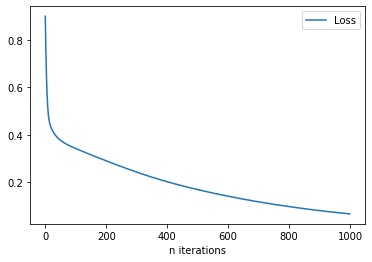

In [83]:
plt.plot(per_model.loss_curve_)
plt.legend(['Loss'])
plt.xlabel('n iterations')
plt.show()

In [84]:
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()+(y_test!=y_pred).sum()))

41 / 227


In [ ]:
per_model

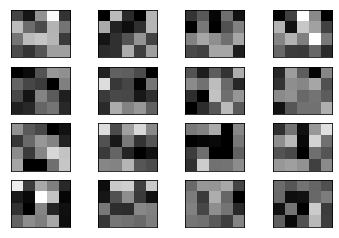

In [40]:
fig, axes = plt.subplots(4, 4)

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = per_model.coefs_[0].min(), per_model.coefs_[0].max()
for coef, ax in zip(per_model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(4, 5), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [86]:
print(accuracy_score(y_pred, y_test))

0.8193832599118943


In [87]:
print(confusion_matrix(y_pred, y_test))

[[ 26  20]
 [ 21 160]]


# Support Vector Machine

In [88]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='rbf')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
unique, counts = np.unique(y_pred_svc, return_counts=True)
dict(zip(unique, counts))

{0: 32, 1: 195}

In [89]:
from sklearn.svm import SVC
C = np.linspace(1, 50, 50).reshape(-1)
accuracy_linear = []
accuracy_poly = []
accuracy_rbf = []


for c in C:
    SVM = SVC(kernel='linear', C=c, random_state=40)
    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    accuracy_linear.append(accuracy_score(y_test, y_pred)*100)
for c in C:
    SVM = SVC(kernel='poly', C=c, random_state=40)
    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    accuracy_poly.append(accuracy_score(y_test, y_pred)*100)
for c in C:
    SVM = SVC(kernel='rbf', C=c, random_state=40)
    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    accuracy_rbf.append(accuracy_score(y_test, y_pred)*100)

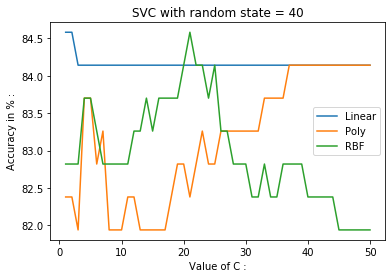

Mean accuracy of Kernals : 
Linear :  84.15859030837004
RBF :  82.9691629955947
Poly :  83.16299559471365


In [90]:

plt.plot(C, accuracy_linear, label="Linear")
plt.plot(C, accuracy_poly, label="Poly")
plt.plot(C, accuracy_rbf, label="RBF")
plt.xlabel("Value of C :")
plt.ylabel("Accuracy in % :")
plt.title("SVC with random state = 40")
plt.legend()
plt.show()
print("Mean accuracy of Kernals : ")
print("Linear : ", np.mean(accuracy_linear))
print("RBF : ", np.mean(accuracy_rbf))
print("Poly : ", np.mean(accuracy_poly))

In [92]:
print(accuracy_score(y_pred_svc, y_test))
print(confusion_matrix(y_pred_svc, y_test))

0.8281938325991189
[[ 20  12]
 [ 27 168]]


In [93]:
svc.support_

array([  5,   8,   9,  16,  25,  38,  41,  49,  51,  60,  62,  78,  95,
        97, 107, 108, 115, 117, 123, 125, 126, 129, 132, 142, 143, 144,
       146, 157, 164, 166, 175, 180, 181, 186, 188, 193, 197, 205, 206,
       207, 213, 220, 227, 230, 231, 244, 250, 256, 267, 277, 278, 287,
       290, 291, 297, 299, 300, 303, 311, 321, 322, 327, 333, 334, 335,
       337, 349, 350, 353, 356, 358, 359, 363, 367, 368, 369, 372, 373,
       375, 378, 380, 382, 389, 394, 399, 404, 407, 408, 417, 424, 426,
       428, 430, 433, 437, 438, 442, 451, 452, 455, 460, 468, 481, 484,
       487, 489, 491, 503, 505, 508, 510, 513, 514, 518, 522, 525,   4,
        10,  12,  19,  20,  22,  23,  26,  29,  32,  33,  34,  35,  42,
        43,  45,  52,  54,  55,  56,  58,  59,  65,  68,  73,  76,  89,
        92,  94, 101, 102, 103, 105, 106, 109, 124, 127, 128, 135, 137,
       140, 141, 145, 154, 156, 167, 170, 172, 173, 174, 187, 189, 190,
       191, 194, 196, 199, 203, 204, 210, 211, 214, 217, 219, 22

In [95]:
svc.intercept_

array([0.03932238])

In [ ]:
# Use for only linear kernel
# Create the hyperplane
# w = svc.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(-2.5, 0.0)
# yy = a * xx - (svc.intercept_[0]) / w[1]

# plt.figure(figsize=(20,10))
# sns.lineplot(xx, yy)
# sns.scatterplot(X[:, 0], X[:, 1], hue=target)

In [30]:
svc.support_vectors_

array([[ 0.28610239, -0.19427935, -0.59426197, ..., -0.36448377,
        -0.5566583 , -0.44342532],
       [-1.76255207, -0.16101329,  0.19742209, ...,  0.55943073,
         0.84471844, -0.21431193],
       [ 0.28634273, -0.40739279, -0.74994014, ...,  0.21879057,
         0.36268801, -0.41985133],
       ...,
       [-1.15038917, -0.26616564,  0.18663982, ...,  0.05888329,
         0.53319431, -0.43341799],
       [-1.11883258,  0.93764444, -0.84786673, ..., -0.74473448,
        -0.9275898 , -0.42810074],
       [-1.02812843, -0.02478921,  0.41218116, ..., -0.23084399,
        -0.3867302 ,  0.83043094]])

In [32]:
svc.n_support_

array([118, 124])

In [33]:
svc.fit_status_

0

In [35]:
svc.class_weight

In [36]:
svc.get_params(deep=True)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}